VIT

In [1]:
#需要先安装timm

#！pip install timm
# or pip install --upgrade git+https://github.com/rwightman/pytorch-image-models.git

In [2]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from timm.models import vit_base_patch16_224


加载图片

In [3]:
image_raw = Image.open("./dumplings.jpeg")
image = np.array(image_raw)/255.0
image = torch.from_numpy(image).permute(2, 0, 1).float()
resize = transforms.Resize([224,224])
image = resize(image)
normalise = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))# imagenet mean and  std
image = normalise(image)
image = image.unsqueeze(0)
print(image.shape)

torch.Size([1, 3, 224, 224])


/home/alex/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


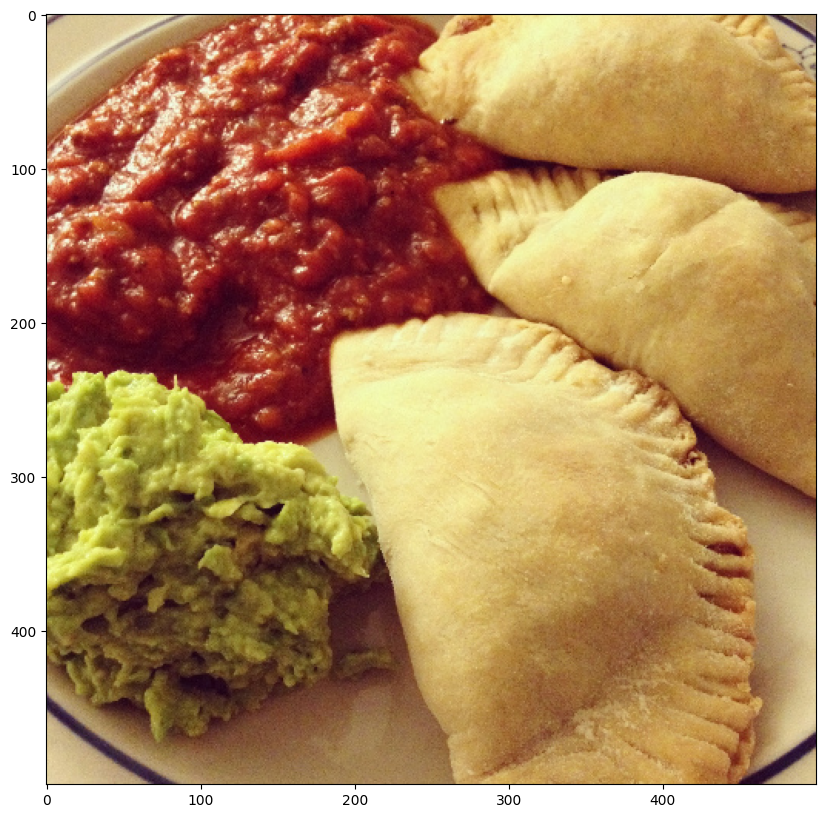

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(image_raw, cmap="gray", vmin=0.0, vmax=1.0)
plt.show()


在标准VIT 上面进行图片的前向传播

In [5]:
vit_base = vit_base_patch16_224()
out = vit_base(image)
assert(out.shape == torch.Size([1, 1000]))
print(out.shape)

In [ ]:
print(vit_base)

将PATCH EMBED 模块加一个RESNET网络。


In [10]:
from timm.models import vit_base_resnet26d_224

vit_hybrid_base = vit_base_resnet26d_224()
out = vit_hybrid_base(image) 
assert(out.shape == torch.Size([1, 1000]))

In [ ]:
print(vit_hybrid_base)

回答以下问题：


开放问题：除了这样修改，还可以有什么CNN和VIT结合的方法？

Anwser:
